<a target="_blank" href="https://colab.research.google.com/github/taobrienlbl/advanced_earth_science_data_analysis/blob/spring_2023_iub/lessons/05_multidimensional_arrays_also_plotting/05_warmup.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# WARMUP | Lesson 05

**Goal**: Plot a timeseries of the annual average number of magnitude 6 (or larger) earthquakes.

In this warmup, you will demonstrate your proficiency in using `pandas` and `matplotlib` for scientific data analysis in a Jupyter notebook.  I am intentionally not providing much guidance in this exercise, leaving it to you to determine the best path to the goal.  That said, I do have some specific instructions:

* download [this CSV](https://raw.githubusercontent.com/taobrienlbl/advanced_earth_science_data_analysis/spring_2023_iub/lessons/05_multidimensional_arrays_also_plotting/data/usgs_major_earthquakes_1900-2023.csv) file containing a dataset of all earthquakes greater than magnitude 6 that USGS has on record since 1900
* utilize Markdown cells extensively to document your thought process, including notes about the CSV file, its origin, etc.
* comment your code extensively
* use git to stage/commit/push this notebook to your course github repository once done (in a lesson 04 folder)
* bonus: if you still have time, also make a plot of # of earthquakes vs month (the seasonal cycle, if there is one)

A note about the CSV file: I obtained it from [a USGS query for magnitude 6 or larger earthquakes globally since 1900](https://earthquake.usgs.gov/earthquakes/map/?extent=-88.71618,-248.20313&extent=88.70033,336.79688&range=search&timeZone=utc&search=%7B%22name%22:%22Search%20Results%22,%22params%22:%7B%22starttime%22:%221900-01-01%2000:00:00%22,%22endtime%22:%222023-09-22%2023:59:59%22,%22minmagnitude%22:6,%22orderby%22:%22time%22%7D%7D) on Friday September 22, 2023 at 10:20am Eastern.  Though USGS ultimately was the source of the data, my search originated from an [NCEI website](https://www.ngdc.noaa.gov/hazel/view/hazards/earthquake/search).  (See the markdown source of this cell for the specific URLs; the USGS query URL contains the specific query parameters.)

I used the CSV download option provided on the website, and the file was downloaded as `query.csv`; I renamed the file to `usgs_major_earthquakes_1900-2023.csv`.

When I download data like this from a web source, I'll often put it in a `data` folder somewhere and will place a `README` (or `README.md`) file in the `data` directory to give information about where I downloaded the data from and any citations that the data provider requests that I use.  I do this because I often come back to datasets like this later on and it isn't always straightforward to find this information after the fact.

# Solution

*start you markdown comments here*

In [1]:
""" Import libraries """
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
""" Load the CSV file """

# set the file path
input_file = "data/usgs_major_earthquakes_1900-2023.csv"

# load the file
usgs_pd = pd.read_csv(
    input_file,
    header=0,
    parse_dates=[0],
)

# show the first bit of the data frame
usgs_pd.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-09-21 21:11:49.950000+00:00,-14.0039,167.1898,188.419,6.1,mww,76.0,26.0,7.076,0.83,...,2023-09-21T23:17:30.631Z,"41 km WSW of Sola, Vanuatu",earthquake,8.86,4.898,0.054,33.0,reviewed,us,us
1,2023-09-20 14:45:58.609000+00:00,-4.5826,-105.6493,10.000,6.0,mww,110.0,208.0,15.828,1.08,...,2023-09-21T21:02:41.950Z,central East Pacific Rise,earthquake,14.99,1.952,0.050,38.0,reviewed,us,us
2,2023-09-18 13:21:23.790000+00:00,26.4336,125.3032,183.483,6.3,mww,113.0,35.0,2.262,1.21,...,2023-09-19T13:29:35.504Z,"180 km N of Hirara, Japan",earthquake,6.53,4.942,0.044,49.0,reviewed,us,us
3,2023-09-13 11:49:15.926000+00:00,-36.2201,-97.9378,10.000,6.1,mww,117.0,37.0,13.309,0.65,...,2023-09-14T11:52:11.466Z,West Chile Rise,earthquake,10.28,1.860,0.050,39.0,reviewed,us,us
4,2023-09-12 11:03:18.873000+00:00,19.2687,121.2178,41.281,6.3,mww,133.0,21.0,4.049,0.96,...,2023-09-18T13:59:24.715Z,"73 km N of Namuac, Philippines",earthquake,8.03,5.112,0.046,46.0,reviewed,us,us


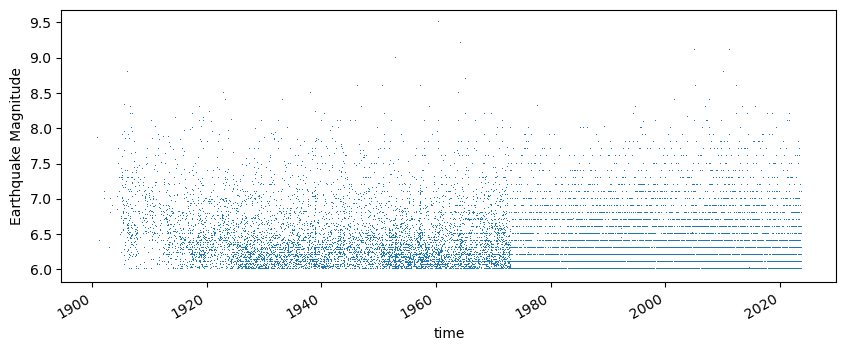

In [7]:
""" Plot the magnitudes versus time. """
# create the figure and the plot (axis) within the figure
fig, ax = plt.subplots(figsize = (10,4))

# draw the timeseries on the plot
usgs_pd.plot('time', 'mag', ax = ax, marker = ',', linestyle = 'none', legend = False)

# set the axis lable
ax.set_ylabel("Earthquake Magnitude")

# show the plot
plt.show()

In [11]:
""" Use groupby to calculate the sum of earthquakes within each year. """

# get the year of each earthquake
earthquake_years = usgs_pd['time'].dt.year

# use groupby to group by year
usgs_year_group = usgs_pd.groupby(earthquake_years)

# calculate the mean earthquake magnitude in each year
magnitude_means = usgs_year_group['mag'].mean()

# calculate the number of earthquakes in each year
yearly_counts = usgs_year_group['mag'].count()

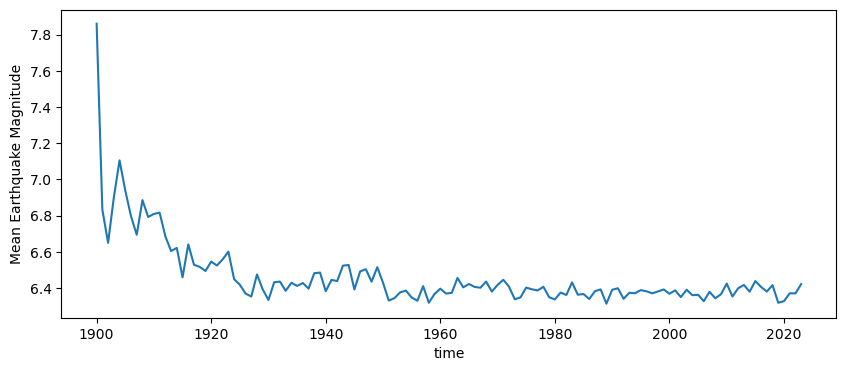

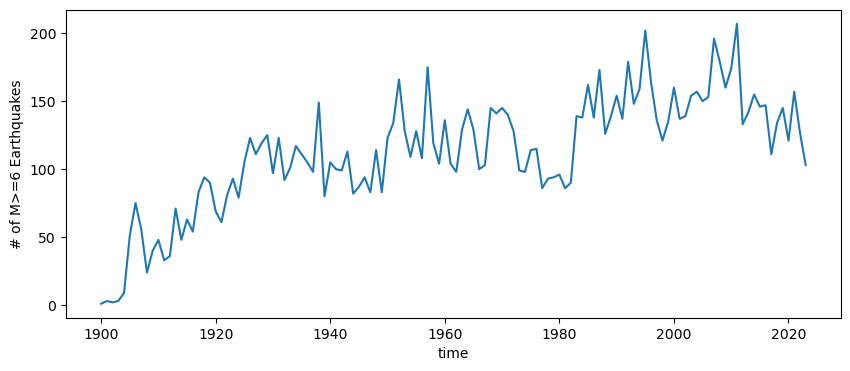

In [14]:
""" Generate plots of the mean magnitude and total count by year. """

# create the figure and axis
fig, ax = plt.subplots(figsize = (10,4))

# plot magnitude
magnitude_means.plot(ax = ax)

# label axes
ax.set_ylabel("Mean Earthquake Magnitude")

# show the plot
plt.show()



# create the figure and axis
fig, ax = plt.subplots(figsize = (10,4))

# plot count
yearly_counts.plot(ax = ax)

# label axes
ax.set_ylabel(r"# of M>=6 Earthquakes")

# show the plot
plt.show()





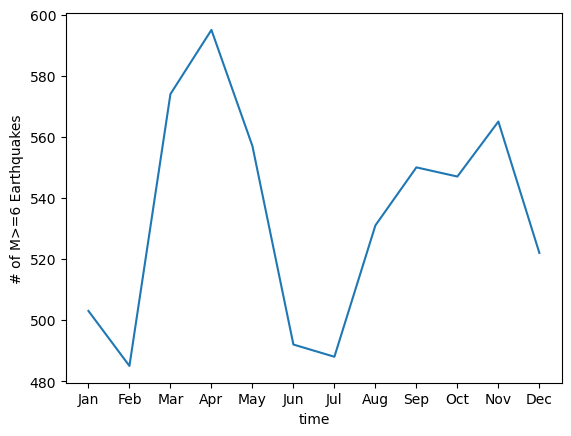

In [19]:
""" Calculate the seasonal cycle of earthquake count. """

# subset the data to only include 1980 to present
usgs_pd_recent = usgs_pd[usgs_pd['time'].dt.year >= 1980]

# get the month of each earthquake
earthquake_months = usgs_pd_recent['time'].dt.month

# group by months
usgs_month_group = usgs_pd_recent.groupby(earthquake_months)

# get the count
earthquake_monthly_count = usgs_month_group['mag'].count()

# create the figure
fig, ax =  plt.subplots()

# plot the count
earthquake_monthly_count.plot(ax = ax)

# label the x-axis as month names
ax.set_xticks(range(1,13))
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

ax.set_ylabel("# of M>=6 Earthquakes")

plt.show()